In [1]:
import pandas as pd 
from tabulate import tabulate
data = pd.read_csv('datos_messages_sesiones.csv')

print(data.head())
data['created_at'] = pd.to_datetime(data['created_at'])


print(data.columns  )

     id                       room_session_id          user_id  \
0  3019  7b554461-322e-46d7-8fbe-76b0d54d9427              NaN   
1  3020  6839986a-b86d-4f57-bc9b-88af1caca663        francisco   
2  3027  7b554461-322e-46d7-8fbe-76b0d54d9427              NaN   
3  3028  7b554461-322e-46d7-8fbe-76b0d54d9427  Benjamín Rogers   
4  3030  6839986a-b86d-4f57-bc9b-88af1caca663              NaN   

                                             content  \
0  { "Tere":{ "Claim": 1, "Evidence": 1, "Warrant...   
1  y tambien la posibilidad de decirle que no sin...   
2  { "Tere":{ "Claim": 1, "Evidence": 1, "Warrant...   
3  y que al no existir regulacion de esta, pueda ...   
4  ¡Gran trabajo hasta ahora, Alejandro y Francis...   

                         created_at sender_type  agent_name  \
0  2025-11-17 14:38:15.706357+00:00       agent   Validador   
1  2025-11-17 14:38:19.772876+00:00        user         NaN   
2  2025-11-17 14:38:53.356233+00:00       agent   Validador   
3  2025-11-17 

In [ ]:
pd.set_option('display.max_colwidth', None)

data.groupby('room_session_id')['user_id'].unique().reset_index()


,room_session_id,user_id
0,24869212-0a3b-438a-9248-dc4c95767bae,"[nan, Gustavo]"
1,3c334700-82d8-4b44-941e-10c028889239,"[Gustavo, nan, Simon Sapunar, María Olivia Urzúa, Benjamin Solis, Rodolfo B, Juan Pablo Mena]"
2,5bce17ae-3d33-4713-b4f5-a63f888841d6,"[nan, Martin Espinoza, Andrés Berrios , Pablo Villagran, Jorge Beltran]"
3,6839986a-b86d-4f57-bc9b-88af1caca663,"[francisco, nan, Alejandro]"
4,7b554461-322e-46d7-8fbe-76b0d54d9427,"[nan, Benjamín Rogers, Antonia Grandon, Tere, Enzo Palavicino]"
5,92e5445e-7af0-4fbe-b53d-9e080f65d176,"[nan, P_Moy, Rodolfo Cisternas]"
6,c220708e-1bbb-4e28-a7fb-872af1de3379,"[Sergio Sepúlveda, nan, francisco, Oscar Ignacio Carrasco Alvarez, Antonia, Alberto Zúñiga, Domingo]"
7,fd701be3-5fe1-4a3a-a482-db52a09d3ca5,"[Matias, nan, Joaquin, José Domingo Plaza, cristobal diaz]"


In [7]:
data['user_id'].unique()    

array([nan, 'francisco', 'Benjamín Rogers', 'P_Moy', 'Gustavo',
       'Alejandro', 'Matias', 'Antonia Grandon', 'Rodolfo Cisternas',
       'Tere', 'Joaquin', 'José Domingo Plaza', 'Sergio Sepúlveda',
       'Martin Espinoza', 'Andrés Berrios ', 'Simon Sapunar',
       'María Olivia Urzúa', 'Pablo Villagran', 'Benjamin Solis',
       'Oscar Ignacio Carrasco Alvarez', 'Antonia', 'Alberto Zúñiga',
       'Jorge Beltran', 'Domingo', 'Rodolfo B', 'Juan Pablo Mena',
       'Enzo Palavicino', 'cristobal diaz'], dtype=object)

In [ ]:
# Ordenar los datos por 'id_sala' y 'timestamp' cronológicamente
data_sorted = data.sort_values(by=['room_session_id', 'created_at'])

# Reiniciar índice para mayor claridad
data_sorted = data_sorted.reset_index(drop=True)
from tabulate import tabulate

tabla_completa = tabulate(data_sorted, headers='keys', tablefmt='fancy_grid')

with open("tabla_completa.txt", "w", encoding="utf-8") as f:
    f.write(tabla_completa)

print("Archivo generado: tabla_completa.txt")


Archivo generado: tabla_completa.txt


: 

In [ ]:

# Crear columnas indicadoras (1 = ocurre, 0 = no)
data['is_user'] = (data['sender_type'] == 'user').astype(int)
data['is_agent_validador'] = ((data['sender_type'] == 'agent') & (data['agent_name'] == 'Validador')).astype(int)
data['is_agent_orientador'] = ((data['sender_type'] == 'agent') & (data['agent_name'] == 'Orientador')).astype(int)
data['is_agent_curador'] = ((data['sender_type'] == 'agent') & (data['agent_name'] == 'Curador')).astype(int)

# Agrupar por sesión
resumen = data.groupby('room_session_id').agg(
    mensajes_user=('is_user', 'sum'),
    mensajes_validador=('is_agent_validador', 'sum'),
    mensajes_orientador=('is_agent_orientador', 'sum'),
    mensajes_curador=('is_agent_curador', 'sum'),
    mensajes_totales=('content', 'count')
).reset_index()
with open("resumen_sesiones.txt", "w", encoding="utf-8") as f:
    f.write(tabulate(resumen, headers='keys', tablefmt='fancy_grid'))
print(resumen)

                        room_session_id  mensajes_user  mensajes_validador  \
0  24869212-0a3b-438a-9248-dc4c95767bae              1                   1   
1  3c334700-82d8-4b44-941e-10c028889239             58                  31   
2  5bce17ae-3d33-4713-b4f5-a63f888841d6             54                  26   
3  6839986a-b86d-4f57-bc9b-88af1caca663             36                  26   
4  7b554461-322e-46d7-8fbe-76b0d54d9427             37                  37   
5  92e5445e-7af0-4fbe-b53d-9e080f65d176             12                  12   
6  c220708e-1bbb-4e28-a7fb-872af1de3379             77                  18   
7  fd701be3-5fe1-4a3a-a482-db52a09d3ca5             17                  16   

   mensajes_orientador  mensajes_curador  mensajes_totales  
0                    5                 0                 7  
1                   12                 7               108  
2                   10                 6                96  
3                   12                 6             

: 

['Orientador', 'Usuario', 'Validador', 'Curador']
Categories (4, object): ['Orientador' < 'Curador' < 'Validador' < 'Usuario']


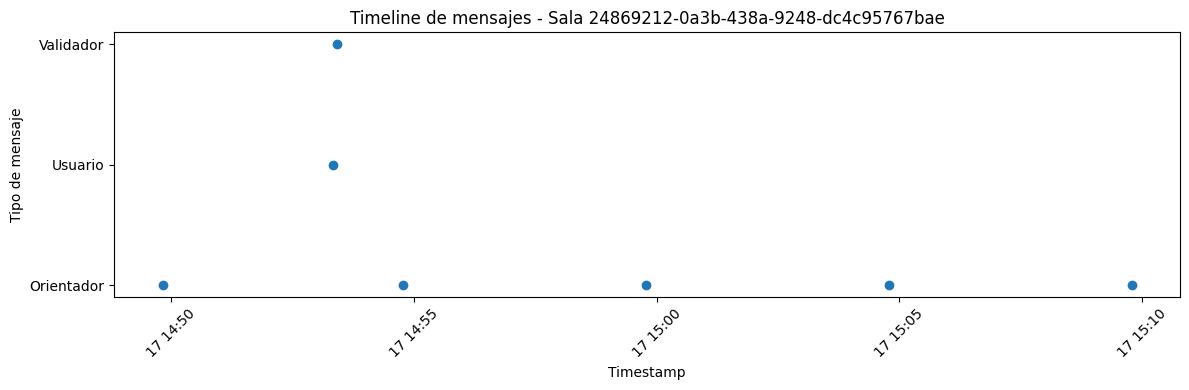

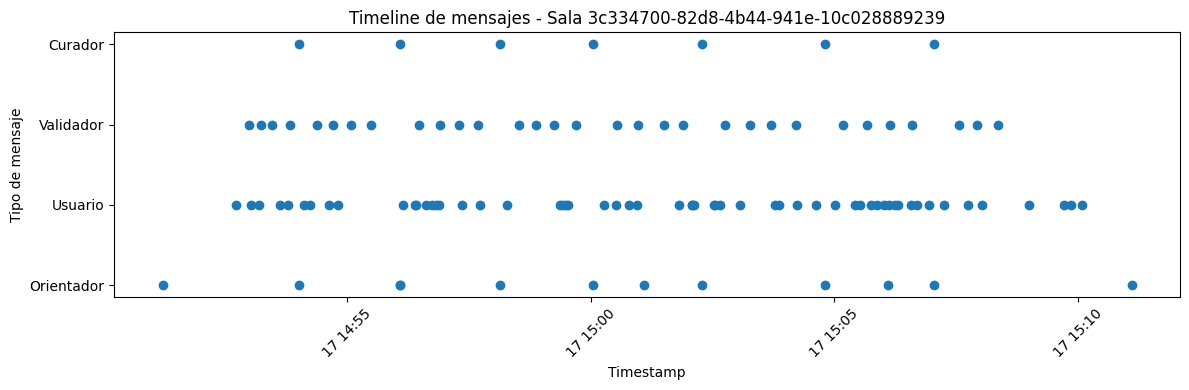

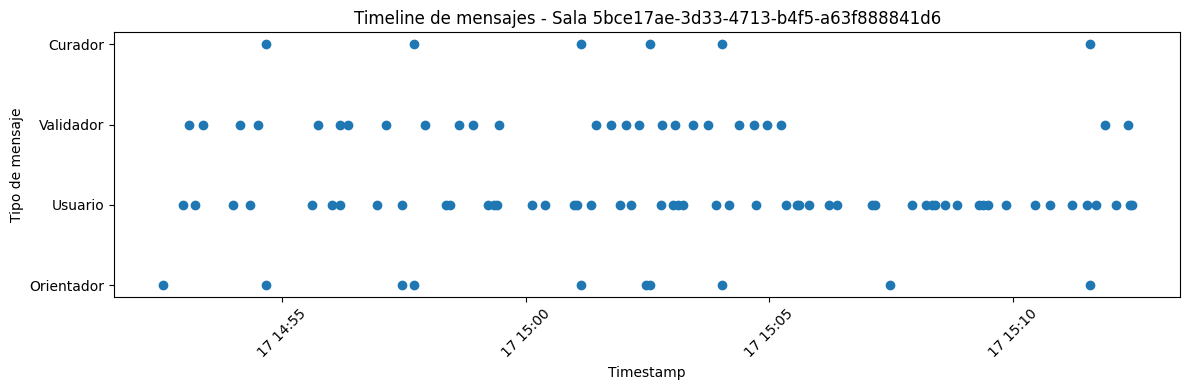

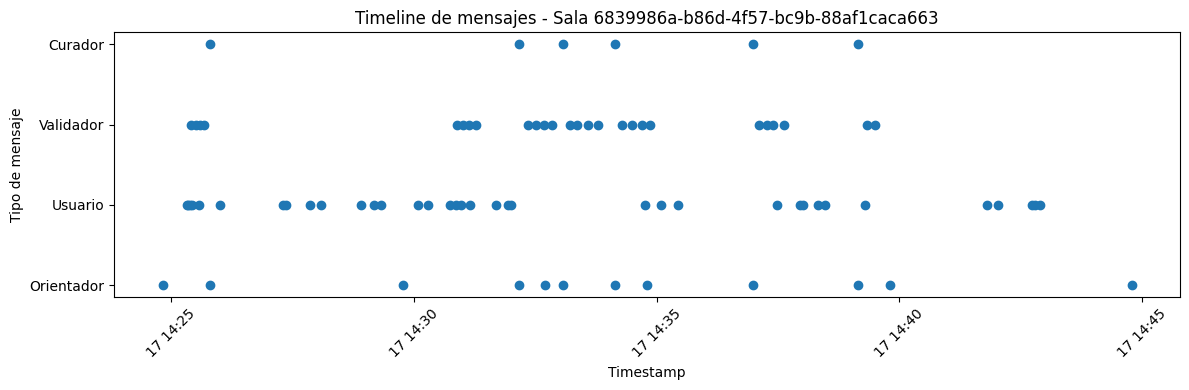

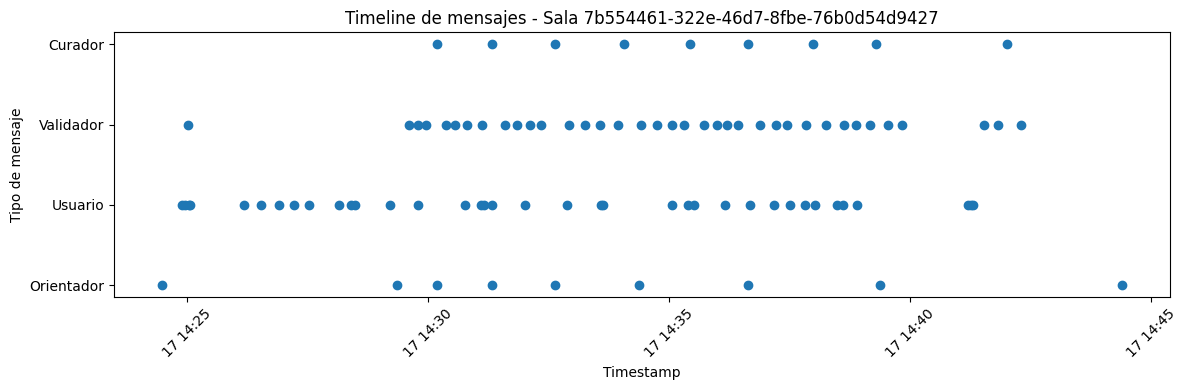

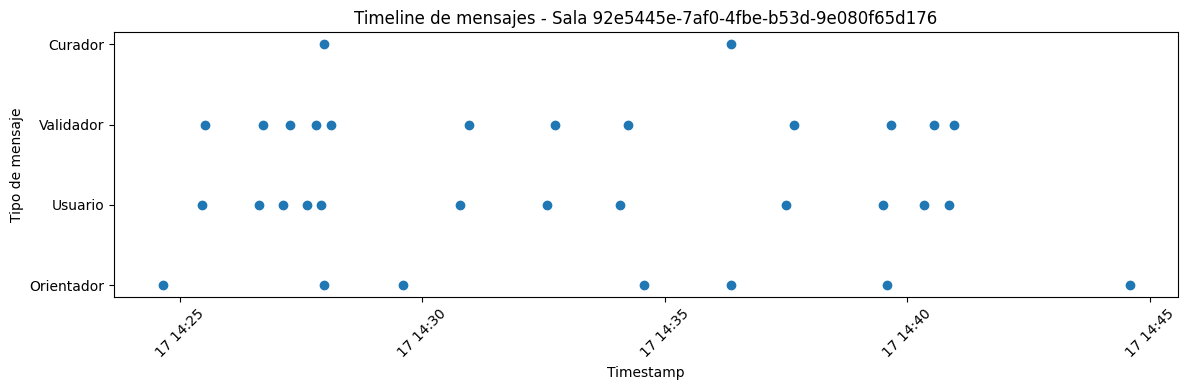

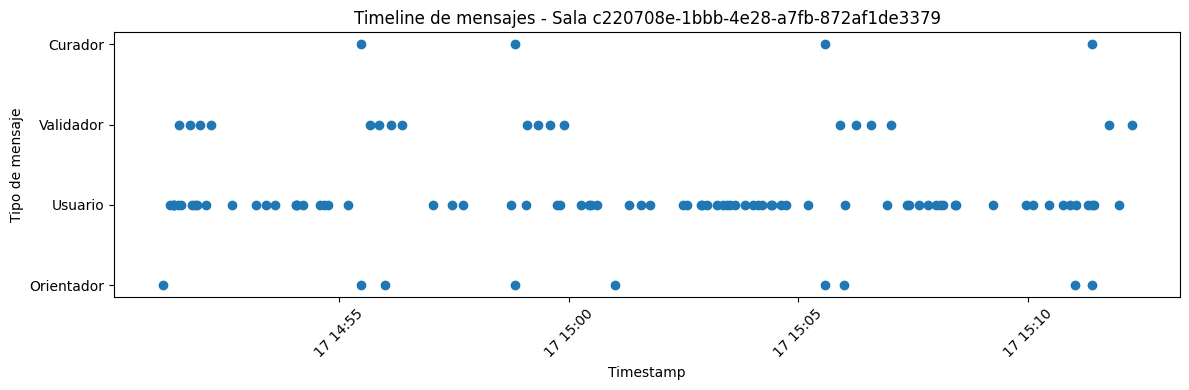

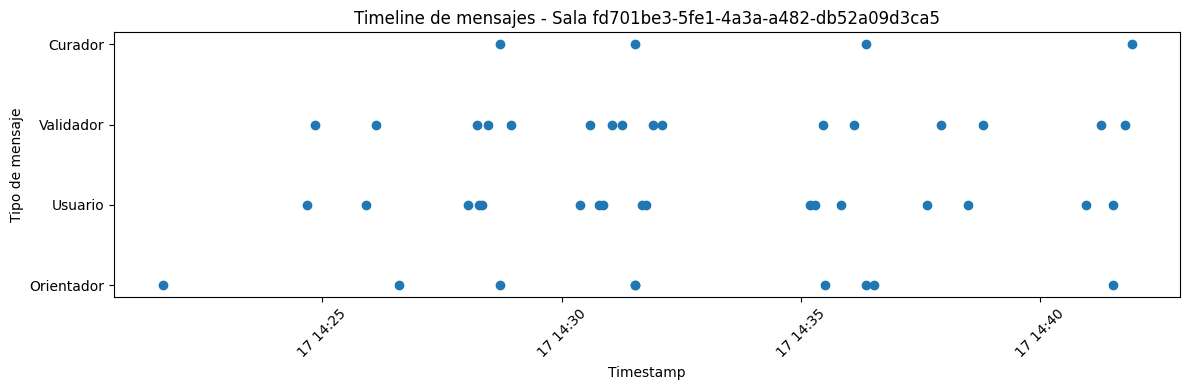

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
data = pd.read_csv("datos_messages_sesiones.csv")

# Asegurar timestamp en formato datetime
data["created_at"] = pd.to_datetime(data["created_at"])

# Crear una columna unificada para tipo de mensaje
def get_role(row):
    if row["sender_type"] == "user":
        return "Usuario"
    if row["sender_type"] == "agent":
        return row["agent_name"] if pd.notna(row["agent_name"]) else "Agente"
    return "Desconocido"

data["role"] = data.apply(get_role, axis=1)
role_order = ["Orientador", "Curador", "Validador", "Usuario"]
data["role"] = pd.Categorical(data["role"], categories=role_order, ordered=True)

# Ordenar por sala y tiempo
data = data.sort_values(by=["room_session_id", "created_at"])

# Obtener todas las salas únicas
salas = data["room_session_id"].unique()
print(data["role"].unique())

# Graficar una figura por sala
for sala in salas:
    df_sala = data[data["room_session_id"] == sala]

    plt.figure(figsize=(12, 4))

    plt.scatter(df_sala["created_at"], df_sala["role"])
    plt.title(f"Timeline de mensajes - Sala {sala}")
    plt.xlabel("Timestamp")
    plt.ylabel("Tipo de mensaje")
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()


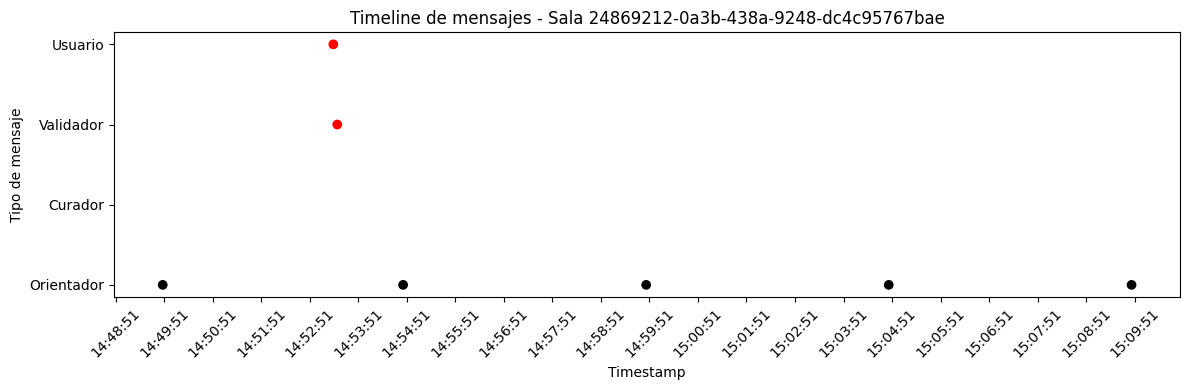

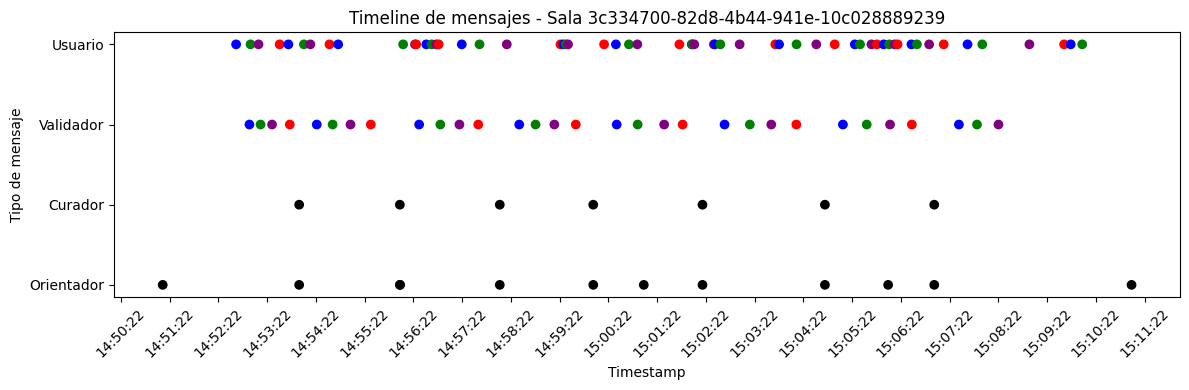

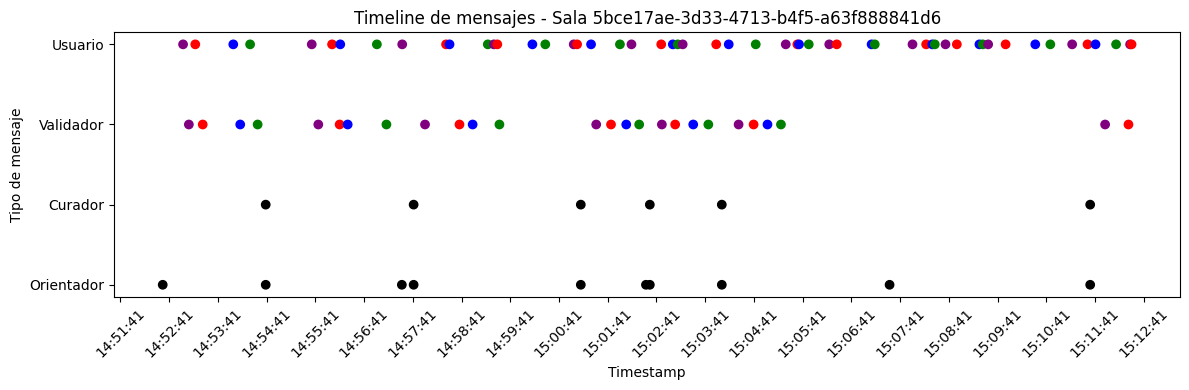

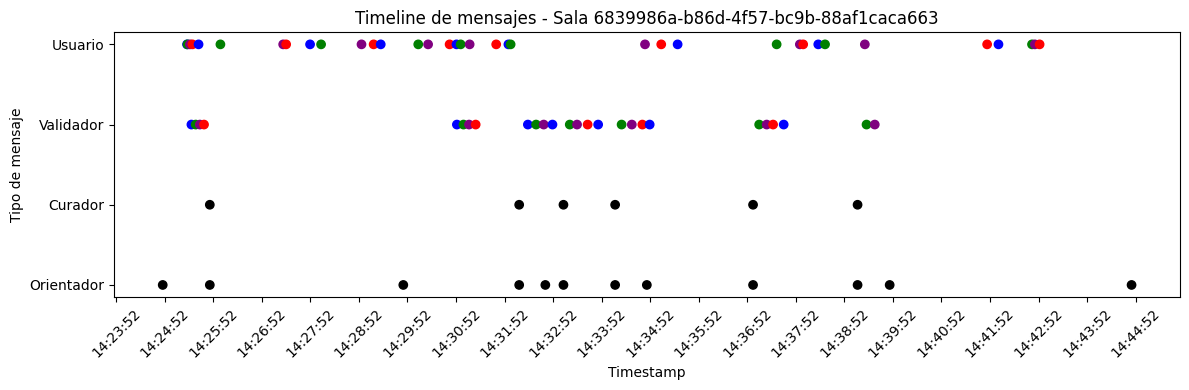

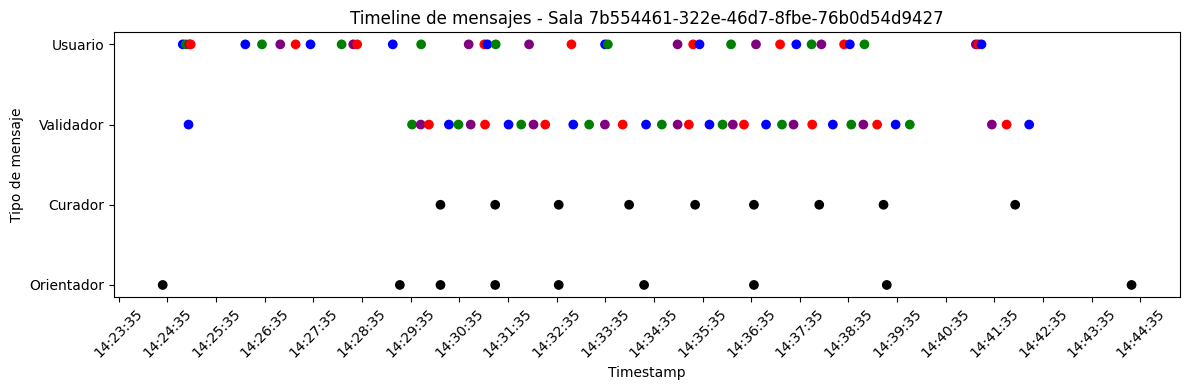

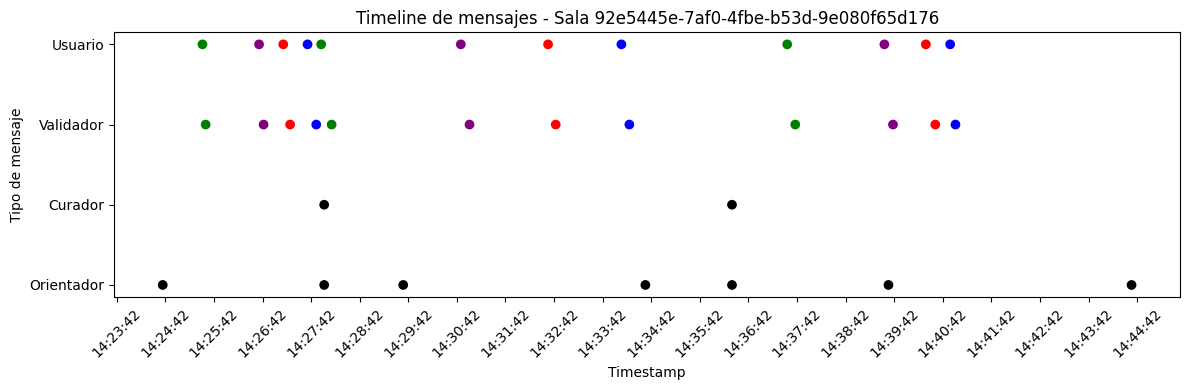

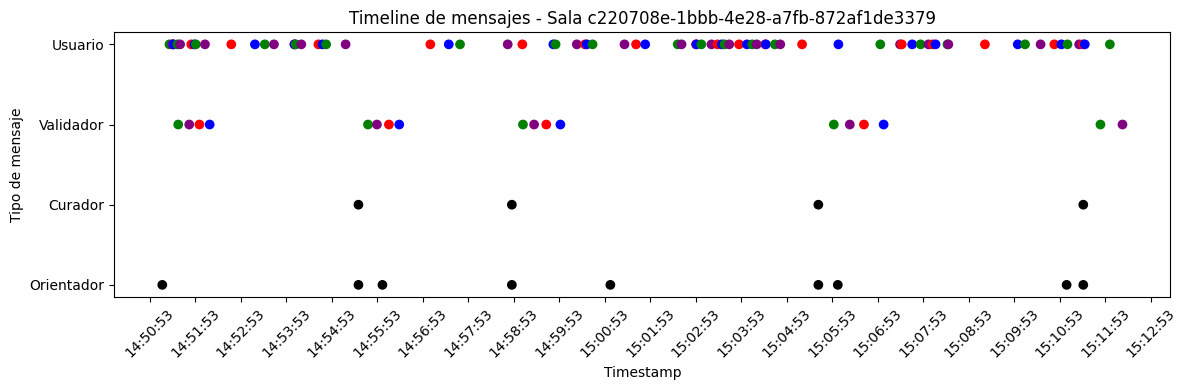

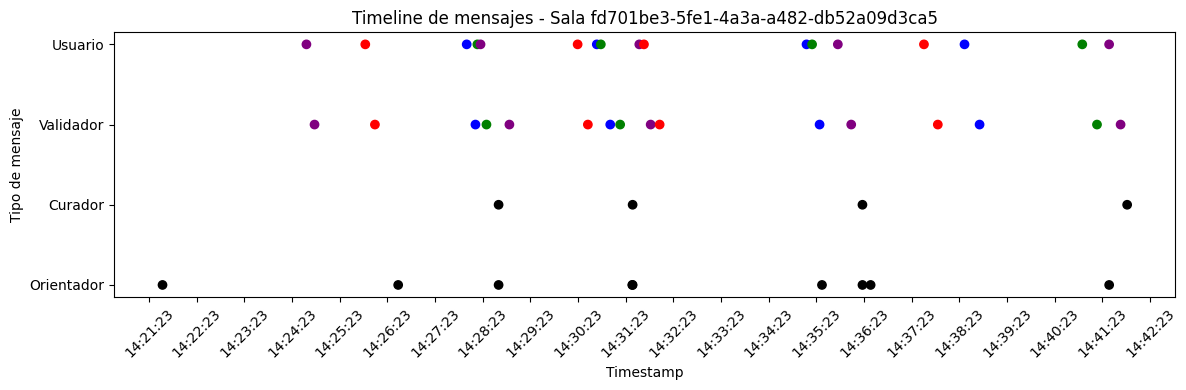

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# ============================================
#  CARGA Y PREPROCESO
# ============================================

data = pd.read_csv("datos_messages_sesiones.csv")
data["created_at"] = pd.to_datetime(data["created_at"])

def get_role(row):
    if row["sender_type"] == "user":
        return "Usuario"
    if row["sender_type"] == "agent":
        return row["agent_name"] if pd.notna(row["agent_name"]) else "Agente"
    return "Desconocido"

data["role"] = data.apply(get_role, axis=1)

# Normalizamos para evitar problemas de orden alfabético
data["role"] = data["role"].str.capitalize()

# Orden correcto del eje Y
role_order = ["Orientador", "Curador", "Validador", "Usuario"]
data["role"] = pd.Categorical(data["role"], categories=role_order, ordered=True)

# Orden temporal
data = data.sort_values(by=["room_session_id", "created_at"]).reset_index(drop=True)

# ============================================
#  MAPEO DE COLORES CICLICOS PARA USUARIO–VALIDADOR
# ============================================

color_cycle = ["red", "blue", "green", "purple"]

# Diccionario: user_message_id → color
color_map = {}

current_color_index = 0

# Asignar color solo a mensajes de usuario
for idx, row in data.iterrows():
    if row["role"] == "Usuario":
        user_id = row["id"]  # <-- usa la columna real de ID
        color_map[user_id] = color_cycle[current_color_index]
        current_color_index = (current_color_index + 1) % len(color_cycle)

# Crear columna final de color
def assign_color(row):
    if row["role"] == "Usuario":
        return color_map.get(row["id"])

    # Para el Validador: usar parent_message_id
    if row["role"] == "Validador" and pd.notna(row["parent_message_id"]):
        return color_map.get(row["parent_message_id"], "black")

    # Otros agentes no llevan color especial
    return "black"

data["color"] = data.apply(assign_color, axis=1)

# ============================================
#  PLOT POR SALA
# ============================================

salas = data["room_session_id"].unique()
import matplotlib.dates as mdates

for sala in salas:
    df_sala = data[data["room_session_id"] == sala].copy()

    plt.figure(figsize=(12, 4))

    df_sala["role_code"] = df_sala["role"].cat.codes

    plt.scatter(
        df_sala["created_at"],
        df_sala["role_code"],
        c=df_sala["color"]
    )

    plt.yticks(
        ticks=range(len(role_order)),
        labels=role_order
    )

    # === MARCAS DE TIEMPO EXTRA EN EL EJE X ===
    plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=60))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

    plt.title(f"Timeline de mensajes - Sala {sala}")
    plt.xlabel("Timestamp")
    plt.ylabel("Tipo de mensaje")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




=== Procesando sala 24869212-0a3b-438a-9248-dc4c95767bae ===


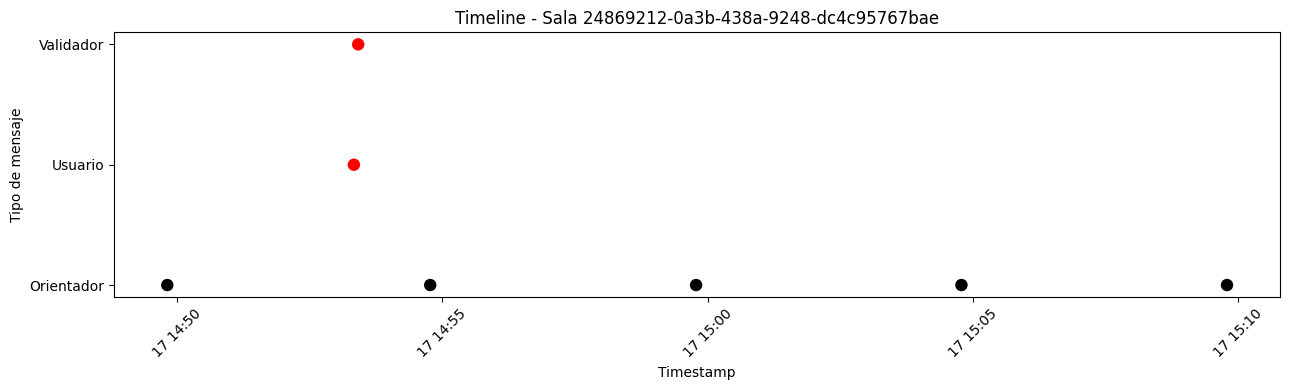

  mensajes Usuario en sala: 1
  mensajes Validador en sala: 1
  curadores que intervinieron: 0
  mensajes de usuario usados por curador (unique): 0

=== Procesando sala 3c334700-82d8-4b44-941e-10c028889239 ===


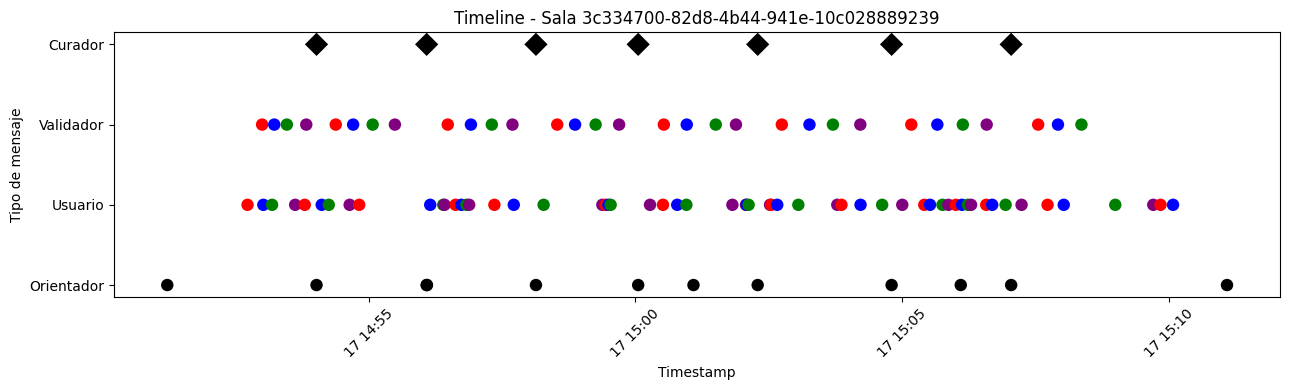

  mensajes Usuario en sala: 58
  mensajes Validador en sala: 31
  curadores que intervinieron: 7
  mensajes de usuario usados por curador (unique): 0

=== Procesando sala 5bce17ae-3d33-4713-b4f5-a63f888841d6 ===


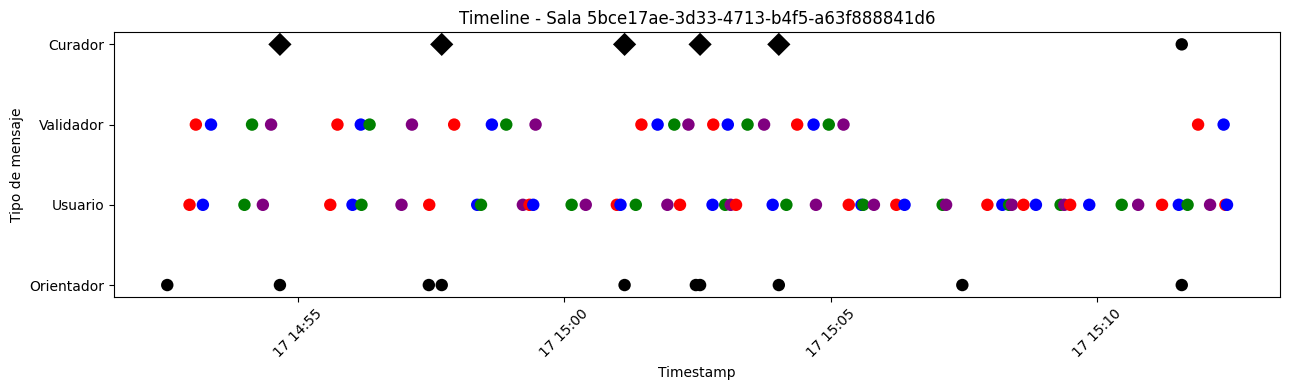

  mensajes Usuario en sala: 54
  mensajes Validador en sala: 26
  curadores que intervinieron: 5
  mensajes de usuario usados por curador (unique): 0

=== Procesando sala 6839986a-b86d-4f57-bc9b-88af1caca663 ===


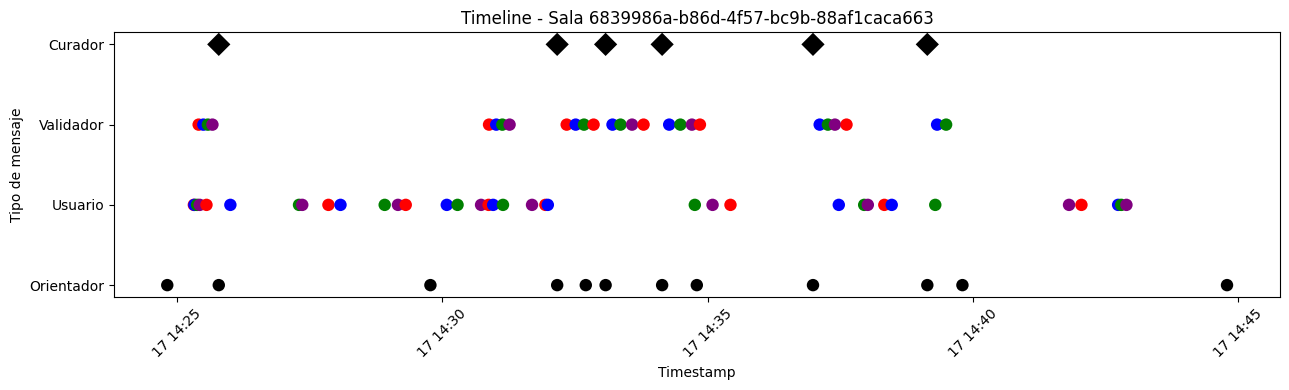

  mensajes Usuario en sala: 36
  mensajes Validador en sala: 26
  curadores que intervinieron: 6
  mensajes de usuario usados por curador (unique): 0

=== Procesando sala 7b554461-322e-46d7-8fbe-76b0d54d9427 ===


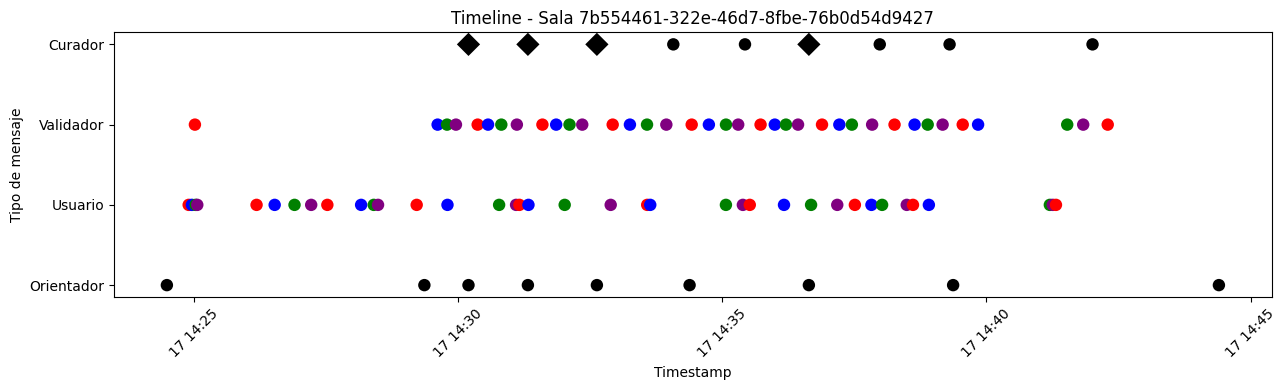

  mensajes Usuario en sala: 37
  mensajes Validador en sala: 37
  curadores que intervinieron: 4
  mensajes de usuario usados por curador (unique): 0

=== Procesando sala 92e5445e-7af0-4fbe-b53d-9e080f65d176 ===


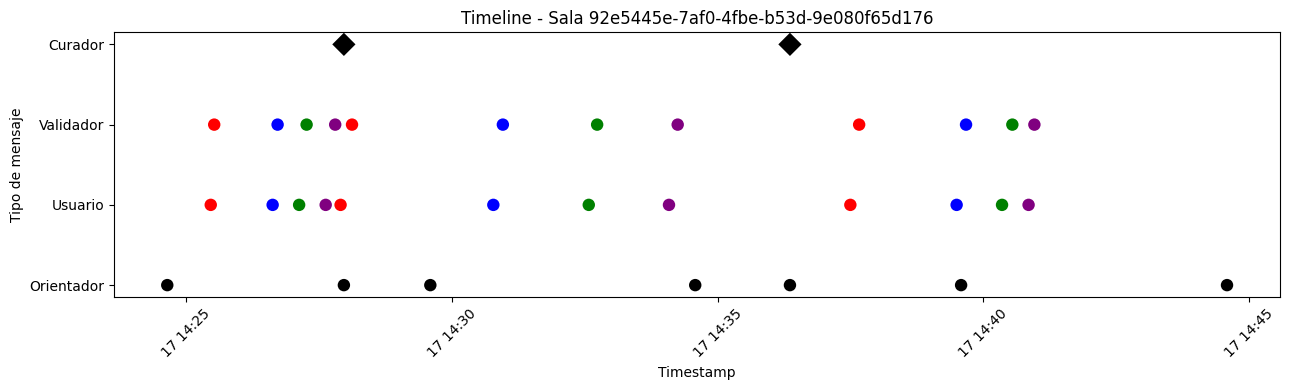

  mensajes Usuario en sala: 12
  mensajes Validador en sala: 12
  curadores que intervinieron: 2
  mensajes de usuario usados por curador (unique): 0

=== Procesando sala c220708e-1bbb-4e28-a7fb-872af1de3379 ===


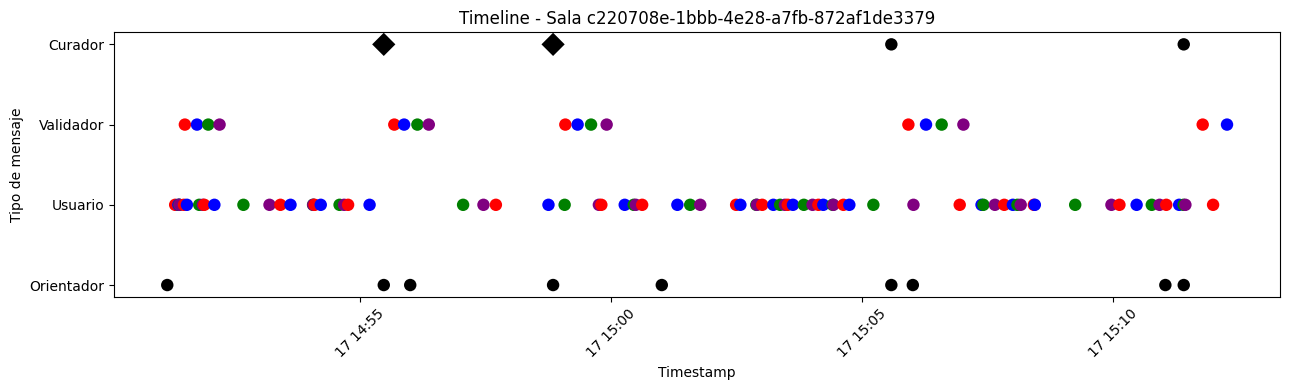

  mensajes Usuario en sala: 77
  mensajes Validador en sala: 18
  curadores que intervinieron: 2
  mensajes de usuario usados por curador (unique): 0

=== Procesando sala fd701be3-5fe1-4a3a-a482-db52a09d3ca5 ===


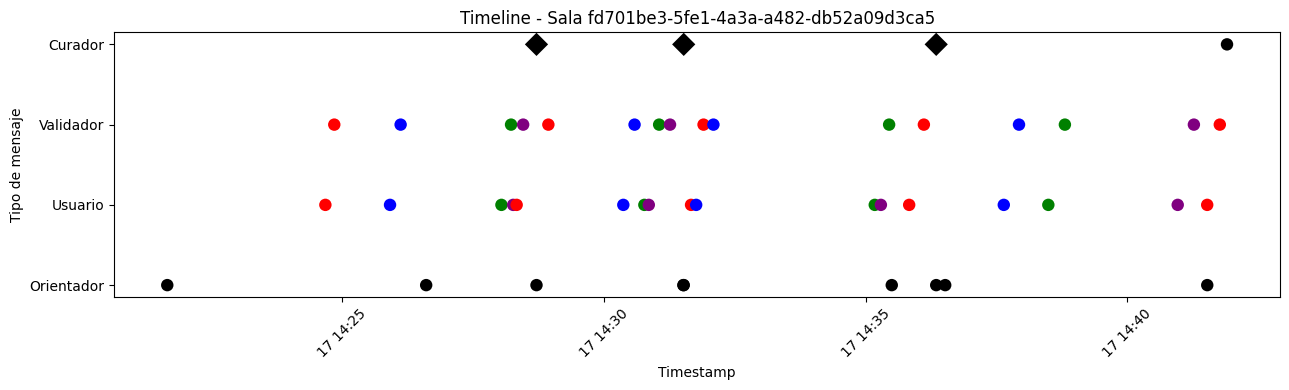

  mensajes Usuario en sala: 17
  mensajes Validador en sala: 16
  curadores que intervinieron: 3
  mensajes de usuario usados por curador (unique): 0


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# ----------------------------
# Config
# ----------------------------
CSV_PATH = "datos_messages_sesiones.csv"  # ruta a tu CSV
color_cycle = ["red", "blue", "green", "purple"]

# ----------------------------
# Carga y preprocesado general
# ----------------------------
data = pd.read_csv(CSV_PATH)
data["created_at"] = pd.to_datetime(data["created_at"])

def get_role(row):
    if row["sender_type"] == "user":
        return "Usuario"
    if row["sender_type"] == "agent":
        return row["agent_name"] if pd.notna(row["agent_name"]) else "Agente"
    return "Desconocido"

data["role"] = data.apply(get_role, axis=1)
role_order = ["Orientador", "Curador", "Validador", "Usuario"]
data["role"] = pd.Categorical(data["role"], categories=role_order, ordered=True)

# Aseguramos orden por sala y tiempo
data = data.sort_values(["room_session_id", "created_at"]).reset_index(drop=True)

# ----------------------------
# Funciones auxiliares
# ----------------------------
def parse_curator_content_json(content):
    """Intenta parsear el content del curador; devuelve dict o {}."""
    try:
        return json.loads(content) if pd.notna(content) else {}
    except Exception:
        return {}

# ----------------------------
# Procesar por sala
# ----------------------------
salas = data["room_session_id"].unique()

for sala in salas:
    print(f"\n=== Procesando sala {sala} ===")
    df = data[data["room_session_id"] == sala].copy().reset_index(drop=True)

    # 1) Asignar colores cíclicos a mensajes de Usuario dentro de la sala
    color_map = {}           # user_message_id -> color
    cycle_idx = 0

    user_rows = df[df["role"] == "Usuario"]
    # itero en orden temporal (ya está ordenado)
    for _, r in user_rows.iterrows():
        msg_id = r["id"]   # <-- asegúrate que la columna de id se llame "id"
        # si ya tiene color (caso raro) no lo reasignamos
        if msg_id not in color_map:
            color_map[msg_id] = color_cycle[cycle_idx]
            cycle_idx = (cycle_idx + 1) % len(color_cycle)

    # 2) Detectar curadores que intervienen y extraer used_message_ids
    df["curador_interviene"] = False
    df["used_message_ids"] = [[] for _ in range(len(df))]

    for idx, row in df.iterrows():
        if row["role"] == "Curador":
            parsed = parse_curator_content_json(row.get("content", None))
            if parsed.get("intervenir") == "Sí":
                df.at[idx, "curador_interviene"] = True

            used = parsed.get("used_message_ids", [])
            # filtramos solo ids que efectivamente correspondan a mensajes de Usuario en la misma sala
            if isinstance(used, list) and len(used) > 0:
                # convertimos a int si vienen como strings (intentar)
                cleaned = []
                for u in used:
                    try:
                        uu = int(u)
                        # comprobamos que ese id exista y sea de un Usuario en esta sala
                        mask = (df["id"] == uu) & (df["role"] == "Usuario")
                        if mask.any():
                            cleaned.append(uu)
                    except Exception:
                        continue
                df.at[idx, "used_message_ids"] = cleaned

    # 3) Construir set de mensajes de usuario que fueron usados por algún curador (en esta sala)
    used_by_curator = set()
    for lst in df["used_message_ids"]:
        if isinstance(lst, list):
            used_by_curator.update(lst)

    # 4) Para cada fila, asignar color según reglas:
    #    - Usuario: su color del ciclo
    #    - Validador: color del parent_message_id (si existe y es usuario)
    #    - Otros: color de fondo 'black'
    def get_row_color(r):
        if r["role"] == "Usuario":
            return color_map.get(r["id"], "black")
        if r["role"] == "Validador":
            pid = r.get("parent_message_id", None)
            # parent_message_id puede ser float si hay NaN; comparamos con int
            try:
                pid = int(pid) if pd.notna(pid) else None
            except Exception:
                pid = None
            if pid is not None:
                return color_map.get(pid, "black")
            return "black"
        return "black"

    df["color"] = df.apply(get_row_color, axis=1)
    df["is_used_by_curator"] = df["id"].apply(lambda x: x in used_by_curator)

    # 5) Plot por sala
    plt.figure(figsize=(13, 4))
    plt.title(f"Timeline - Sala {sala}")
    plt.xlabel("Timestamp")
    plt.ylabel("Tipo de mensaje")

    # Dibujamos punto por punto para poder personalizar marker/edge
    for _, row in df.iterrows():
        x = row["created_at"]
        y = row["role"]
        color = row["color"]
        is_used = row["is_used_by_curator"]
        marker = "o"
        size = 80
        edgecolor = "none"
        linewidth = 0

        # Curador que interviene: rombo más grande
        if row["role"] == "Curador" and row["curador_interviene"]:
            marker = "D"
            size = 140
            # si curador interviene, lo ponemos en negro por consistencia visual (o mantén otro color)
            color = "black"

        # Resaltar mensajes de usuario que fueron usados por algún curador: borde
        if is_used:
            edgecolor = "black"
            linewidth = 1.6

        # Si el punto es Usuario o Validador tendrá color asignado ya (si existe)
        plt.scatter(x, y, color=color, marker=marker, s=size,
                    edgecolor=edgecolor, linewidth=linewidth, zorder=3)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Mensajes de debugging/resumen opcional
    print(f"  mensajes Usuario en sala: {len(df[df['role']=='Usuario'])}")
    print(f"  mensajes Validador en sala: {len(df[df['role']=='Validador'])}")
    print(f"  curadores que intervinieron: {df['curador_interviene'].sum()}")
    print(f"  mensajes de usuario usados por curador (unique): {len(used_by_curator)}")



In [4]:
print(data["role"].unique())


['Orientador', 'Usuario', 'Validador', 'Curador']
Categories (4, object): ['Orientador' < 'Curador' < 'Validador' < 'Usuario']


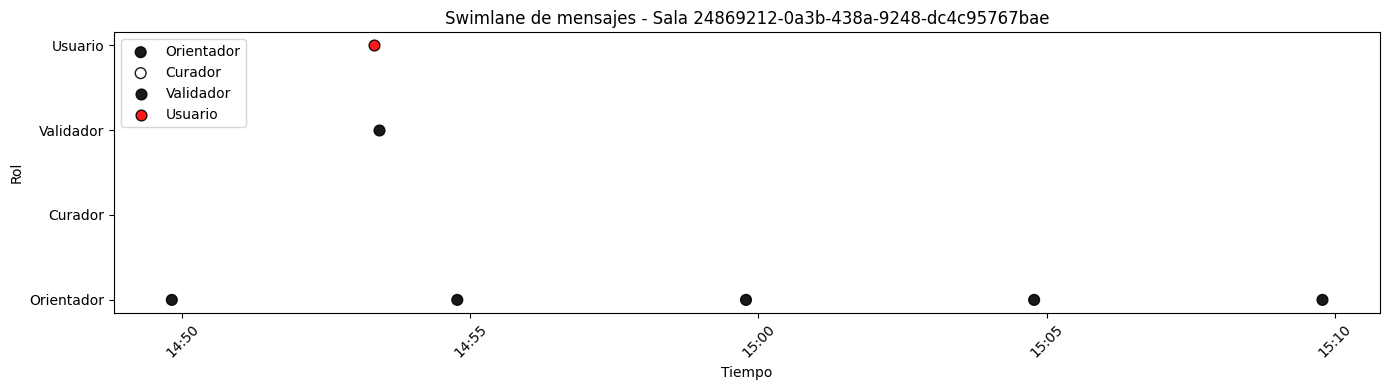

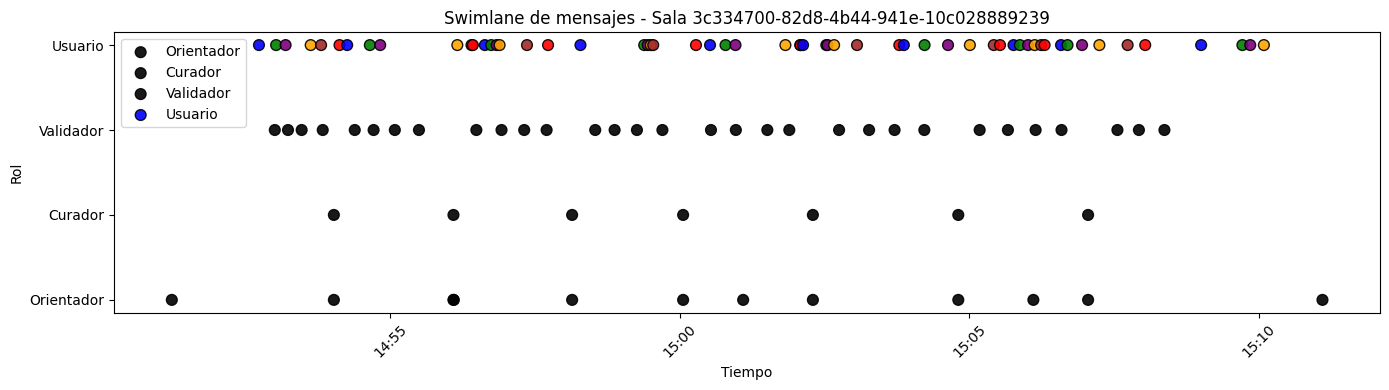

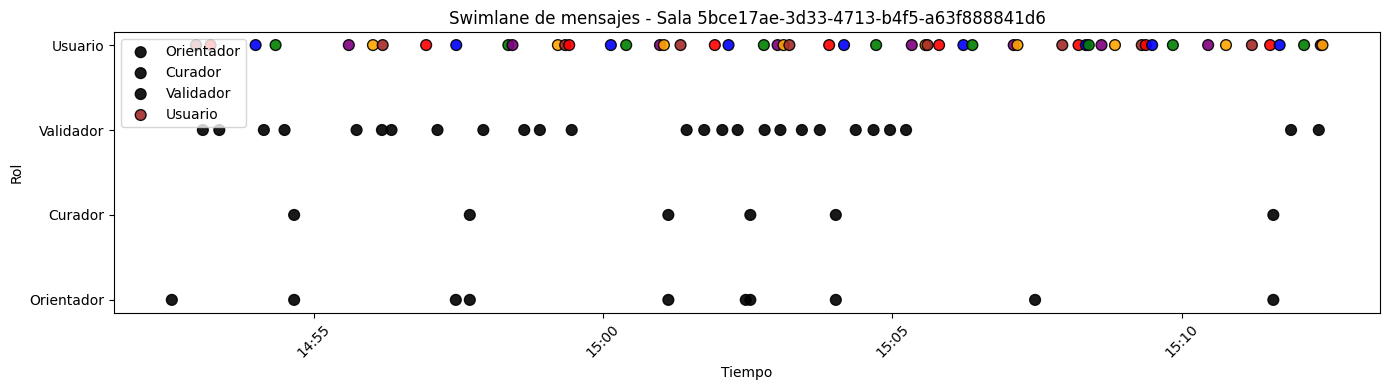

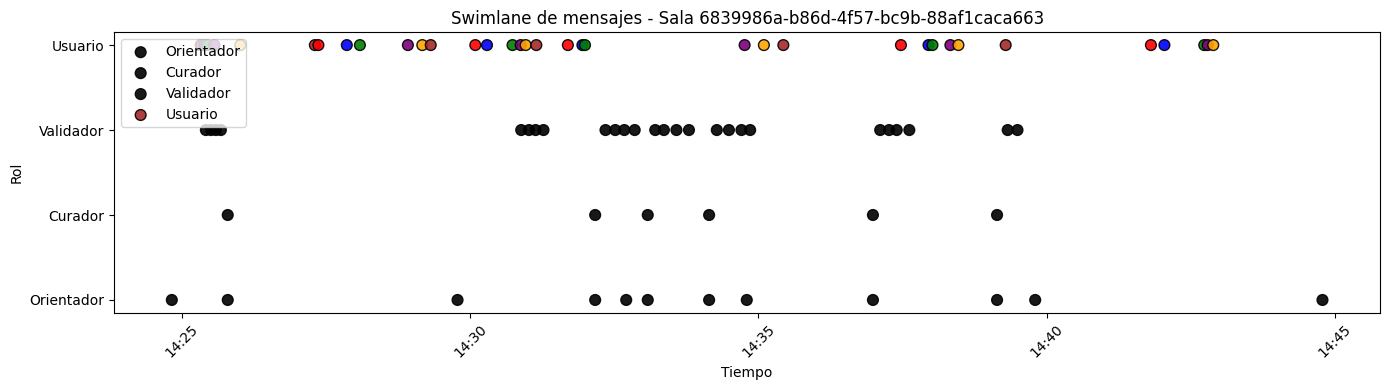

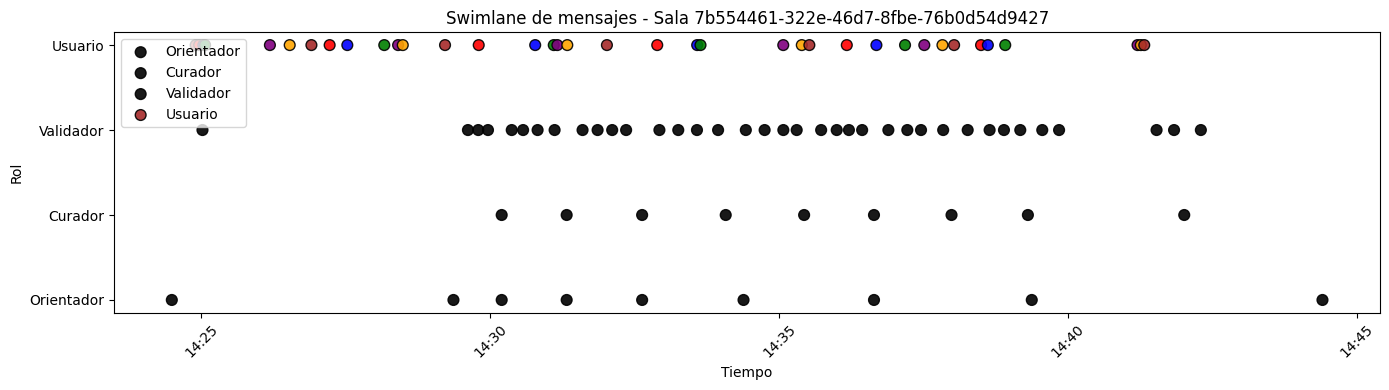

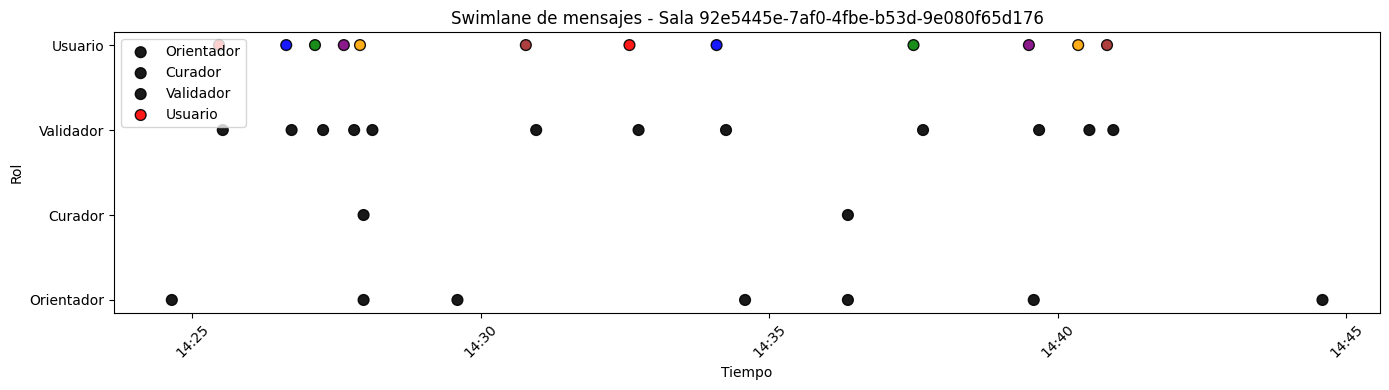

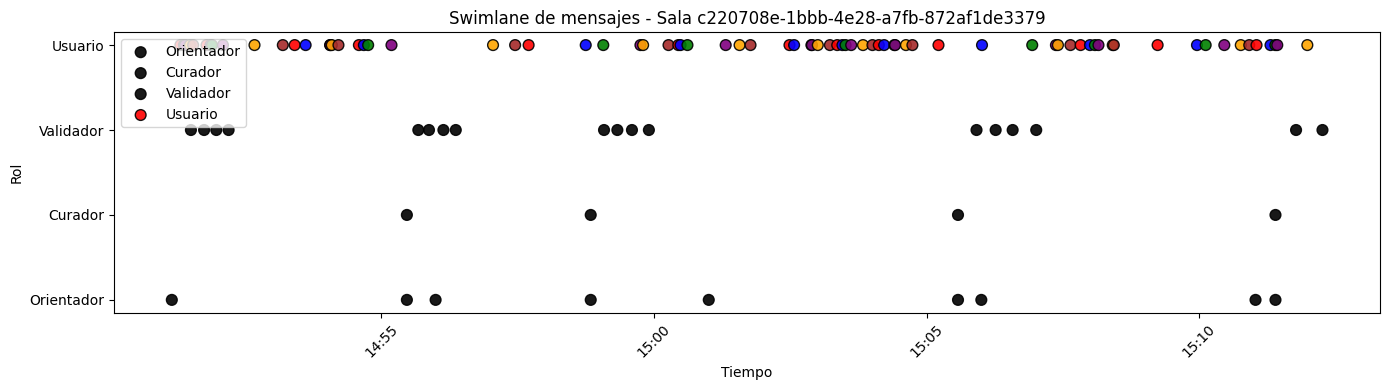

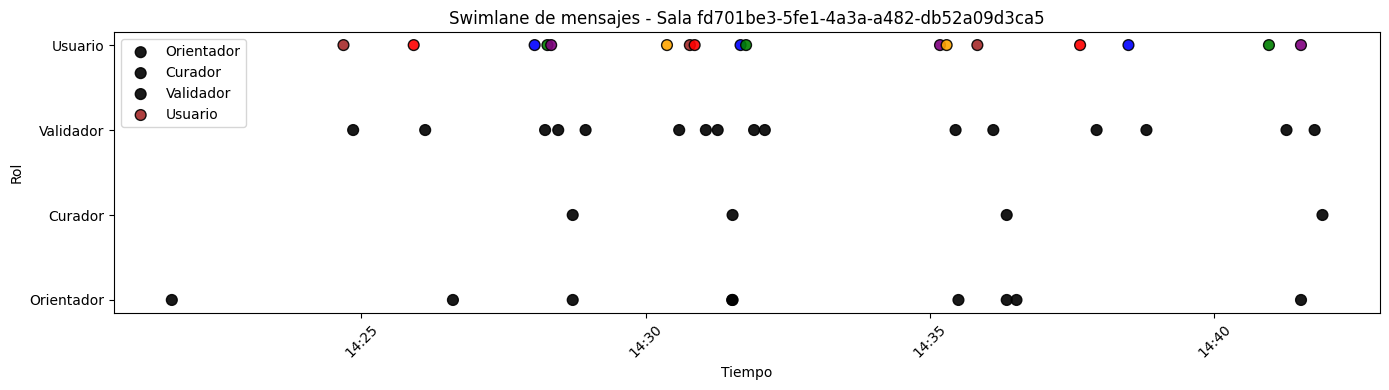

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# =========================
# CONFIGURACIÓN DE DATOS
# =========================

data = pd.read_csv("datos_messages_sesiones.csv")
data["created_at"] = pd.to_datetime(data["created_at"])

# Función para asignar roles legibles
def get_role(row):
    if row["sender_type"] == "user":
        return "Usuario"
    if row["sender_type"] == "agent":
        return row["agent_name"] if pd.notna(row["agent_name"]) else "Agente"
    return "Desconocido"

data["role"] = data.apply(get_role, axis=1)
role_order = ["Orientador", "Curador", "Validador", "Usuario"]
data["role"] = pd.Categorical(data["role"], categories=role_order, ordered=True)

# Orden temporal
data = data.sort_values(by=["room_session_id", "created_at"]).reset_index(drop=True)

# =========================
# ASIGNACIÓN DE COLORES
# =========================

color_cycle = ["red", "blue", "green", "purple", "orange", "brown"]
user_colors = {}
current_color = 0

for idx, row in data.iterrows():
    if row["role"] == "Usuario":
        user_id = row["id"]
        if user_id not in user_colors:
            user_colors[user_id] = color_cycle[current_color % len(color_cycle)]
            current_color += 1

def assign_color(row):
    if row["role"] == "Usuario":
        return user_colors.get(row["id"], "black")
    # Agentes en gris
    return "black"

data["color"] = data.apply(assign_color, axis=1)

# =========================
# PLOT POR SALA
# =========================

salas = data["room_session_id"].unique()

for sala in salas:
    df_sala = data[data["room_session_id"] == sala]

    plt.figure(figsize=(14, 4))

    # Swimlane: dibujar cada rol en una y horizontal
    for i, role in enumerate(role_order):
        df_role = df_sala[df_sala["role"] == role]
        plt.scatter(df_role["created_at"], [i]*len(df_role), c=df_role["color"], s=60, label=role, edgecolors='k', alpha=0.9)

    # Formato eje Y
    plt.yticks(range(len(role_order)), role_order)
    plt.xlabel("Tiempo")
    plt.ylabel("Rol")

    # Formato eje X para fechas
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.xticks(rotation=45)
    
    plt.title(f"Swimlane de mensajes - Sala {sala}")
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.show()
